<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Model Validation              
</p>
</div>

Data Science Cohort Live NYC June 2022
<p>Phase 2: Topic 20</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

# Model Validation: The Bias-Variance Tradeoff and the Train-Test Split

# Objectives

- **Explain** the bias-variance tradeoff and the correlative notions of underfit and overfit models
- **Describe** a train-test split and **explain** its purpose in the context of predictive statistics / machine learning
- **Explain** the algorithm of cross-validation

# Motivation

At this point, we have seen different ways to create models from our data through different linear regression techniques. That's great - but, just like a student practicing for a big end-of-the-year test, we want to make sure our _models_ are ready to predict on data they haven't seen yet. We want to know if the models we make are ready to make predictions for data in the "wild". 

Usually, when our model is ready to be used in the "real world" we refer to this as putting our model into **production** or **deploying** our model. The data it will use to make predictions will then be **data it's never seen before**. 

Our training is the data we have in our notebooks when we build the model - but, in supervised learning, we already have the right answers, just like a student taking a practice test who can still check their own answers in the back of the book. But on the big test, aka when the model is out making predictions in the real world (when it's in production or after it's been deployed), we want to know those predictions are useful. We want to know we'll score just as well on the big test as the practice test!

But you might be thinking, how do I make sure my model I've been cultivating with my own data is ready? This is where we ***model validation*** techniques to ensure our model can **generalize** to data it hasn't directly seen before. 

We'll go over how to ensure our model is ready, but first we have to review how our model can make errors in the context of the **bias-variance tradeoff**.

# The Bias-Variance Tradeoff

## High-Bias vs High-Variance

We can break up how the model makes mistakes (the error) by saying there are three parts:

- Error inherent of the data (noise): **irreducible error**
- Error from being not capturing patterns (too simple): **bias**
- Error from using patterns in the data but don't generalize well (too complex): **variance**

<img src="images/optimal_bias_variance.png" width=600>
     
[[Image Source]](http://scott.fortmann-roe.com/docs/BiasVariance.html)

### Bias

**High-bias** algorithms tend to be less complex, with simple or rigid underlying structure.

![](images/noisy-sine-linear.png)

- They train models that are consistent, but inaccurate on average.
    - These include linear or parametric algorithms such as regression and naive Bayes.
- The following sorts of difficulties could lead to high bias:
  - We did not include the correct predictors
  - We did not take interactions into account
  - We missed a non-linear (polynomial) relationship

      
High-bias models are generally **underfit**: The models have not picked up enough of the signal in the data. And so even though they may be consistent, they don't perform particularly well on the initial data, and so they will be consistently inaccurate.

### Variance

On the other hand, **high-variance** algorithms tend to be more complex, with flexible underlying structure.

![](images/noisy-sine-decision-tree.png)

- They train models that are accurate on average, but inconsistent.
    - These include non-linear or non-parametric algorithms such as decision trees and nearest-neighbor models.
- The following sorts of difficulties could lead to high variance:
  - We included an unreasonably large number of predictors;
  - We created new features by squaring and cubing each feature.

High variance models are **overfit**: The models have picked up on the noise as well as the signal in the data. And so even though they may perform well on the initial data, they will be inconsistently accurate on new data.

### Balancing Bias and Variance

While we build our models, we have to keep this relationship in mind.  If we build complex models, we risk overfitting our models.  Their predictions will vary greatly when introduced to new data.  If our models are too simple, the predictions as a whole will be inaccurate.   

![](images/noisy-sine-third-order-polynomial.png)

The goal is to build a model with enough complexity to be accurate, but not too much complexity to be erratic.

![](images/Bias-vs.-Variance-v5-2-darts.png)

## How To Minimize Bias and Variance

### Combat Underfitting (Bias)

**Bias**: Error introduced by approximating a real-life problem (which may be extremely complicated) by a much simpler model (because the model is too simple to capture the underlying pattern)

**The Solution:** evaluate the performance of our models, using a scoring metric, which will help us catch if a model is underfit - if it's performing quite poorly, it probably isn't capturing the relationship in our data! 

### Combat Overfitting (Variance)

**Variance**: Amount by which our model would change if we estimated it using a different training dataset (because the model is over-learning from the training data)

**The Solution:** don't train your model on ALL of your data, but keep some of it in reserve to test on, in order to simulate how it will work on new/incoming data.

<img src='images/testtrainsplit.png' width =550 />

> - **training set** —a subset to train a model.
> - **test set**—a subset to test the trained model.

How does this fight against overfitting? By witholding data from the training process, we are testing whether the model actually _generalizes_ well. If it does poorly on the test set, it's a good sign that our model learned too much noise from the train set and is overfit! 

![arrested development gif, found by Andy](https://heavy.com/wp-content/uploads/2013/05/tumblr_mjm9fqhrle1rvnnvyo6_250.gif)

In [1]:
# Initial imports!
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Credit data from https://www.kaggle.com/avikpaul4u/credit-card-balance

Target: `Balance`

In [2]:
# Data - only using these cols
df = pd.read_csv('data/Credit.csv', 
                 usecols=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance'])

In [7]:
# Check it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Income   400 non-null    float64
 1   Limit    400 non-null    int64  
 2   Rating   400 non-null    int64  
 3   Cards    400 non-null    int64  
 4   Age      400 non-null    int64  
 5   Balance  400 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 18.9 KB


In [8]:
# Describe it
df.describe()

,Income,Limit,Rating,Cards,Age,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,1999.000000


In [5]:
# Info it


### Train Test Split!

In [9]:
# Importing the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

<details>
    <summary> Answer
    </summary>

from sklearn.model_selection import train_test_split
 </details>

In [10]:
# Need to define our X and y
# Aka - what are we predicting? what are we using to predict?

X = df.drop(columns=['Balance'], axis=1)
y = df['Balance']

<details>
    <summary> Answer
    </summary>
X = df.drop(columns = "Balance")
    
y = df['Balance']
 </details>

In [11]:
# Check out our X
print(X.shape)
X.head()

(400, 5)


,Income,Limit,Rating,Cards,Age
0,14.891,3606,283,2,34
1,106.025,6645,483,3,82
2,104.593,7075,514,4,71
3,148.924,9504,681,3,36
4,55.882,4897,357,2,68


In [12]:
# Check out our y
print(y.shape)
y.head()

(400,)


0    333
1    903
2    580
3    964
4    331
Name: Balance, dtype: int64

In [56]:
# Train test split here!
# Set test_size = .33
# Set random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

<details>
    <summary> Answer
    </summary>

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
 </details>

What did that do?

In [14]:
# Explore our X_train shape
X_train.shape

(268, 5)

In [15]:
# Explore our X_test shape
X_test.shape

(132, 5)

In [16]:
# Did it split correctly?
len(X_train + X_test) == len(X)

True

In [17]:
# What does X_train look like?
X_train.head()

,Income,Limit,Rating,Cards,Age
258,41.400,2561,215,2,36
177,22.379,3965,292,2,34
119,23.012,1410,137,3,81
194,30.406,2120,181,2,79
229,69.943,7555,547,3,76


### **YOU SHOULD ALWAYS START WITH A TRAIN TEST SPLIT.**

**FOR THE PROJECT, YOU WILL BE _REQUIRED_ TO WORK WITH A TRAIN TEST SPLIT**

Note - for the checkpoints and code challenge, follow the instructions given - they might not require a train/test split as they attempt to keep things simple.

BUT we're going to use it in this session! Let's see what this looks like in practice!

In [18]:
# Let's create a full train_df to evaluate our options
# This isn't totally necessary, just will let us visualize later
# You can use this if you prefer the ols method instead of OLS or sklearn
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [19]:
# We'll use the training data to make any modeling decisions!
train_df.head()

,Income,Limit,Rating,Cards,Age,Balance
258,41.400,2561,215,2,36,0
177,22.379,3965,292,2,34,384
119,23.012,1410,137,3,81,0
194,30.406,2120,181,2,79,0
229,69.943,7555,547,3,76,1058


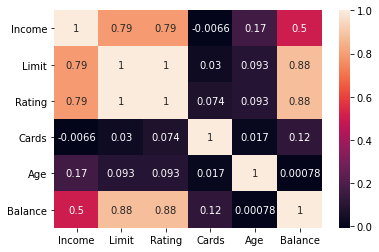

In [20]:
# Code to evaluate our options
sns.heatmap(train_df.corr(), annot = True);

What one variable should we use to start?

- 


### Time to Model!

In [21]:
# Import statsmodels
import statsmodels.api as sm

<details>
    <summary> Answer
    </summary>
import statsmodels.api as sm
 </details>

In [24]:
# Let's use the OLS method
# Set up and fit the model
simple_model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train)).fit()


<details>
    <summary> Answer
    </summary>
simple_model = sm.OLS(y_train, sm.add_constant(X_train['Rating'])).fit()
 </details>

In [25]:
# Check your results!
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     410.8
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          9.85e-122
Time:                        15:37:12   Log-Likelihood:                -1738.6
No. Observations:                 268   AIC:                             3489.
Df Residuals:                     262   BIC:                             3511.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -419.8589     49.920     -8.411      0.000    -518.155    -321.563
Income        -7.1456      0.479    -14.921      0.000      -8.089      -6.203
Limit          0.2013      0.063      3.216      0.001       0.078       0.325
Rating         0.8536      0.939      0.909      0.364      -0.996       2.703
Cards         21.7044      8.272      2.624      0.009       5.417      37.992
Age           -0.9132      0.595     -1.536      0.126      -2.084       0.258
==============================================================================
Omnibus:                       62.981   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.460
Skew:                           1.330   Prob(JB):                     2.07e-23
Kurtosis:                       4.509   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Evaluate!

- 


In [ ]:
#sklearn

In [31]:

from sklearn.linear_model import LinearRegression

simple_sk = LinearRegression()
simple_sk.fit(X_train[['Rating']], y_train)
simple_sk.score(X_train[['Rating']], y_train)

simple_sk.coef_
simple_sk.intercept_

-399.06048677061654

### Now what?

We have a trained model... what can we do with it?

In [32]:
# Get our stats model predictions!
simple_train_preds = simple_sk.predict(X_train[['Rating']])


<details>
    <summary> Answer
    </summary>
simple_train_preds = simple_model.predict(sm.add_constant(X_train['Rating']))
 </details>

In [33]:
#simple_train_preds = simple_sk.predict(X_train[['Rating']]) 

In [52]:
# simple_train_preds 


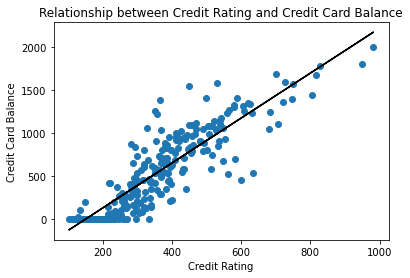

In [35]:
# Just looking at two variables... we can visualize this!

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(train_df['Rating'], train_df['Balance'])

# Plot the line of best fit!
plt.plot(train_df['Rating'], simple_train_preds, color='black')

plt.ylabel('Credit Card Balance')
plt.xlabel('Credit Rating')
plt.title('Relationship between Credit Rating and Credit Card Balance')
plt.show()

In [38]:
# Compare to our actual train values...

train_residuals = simple_train_preds - y_train
train_residuals 

258    164.340226
177    -17.883704
119    -40.056312
194     75.244300
229    -23.664254
          ...    
71     -92.248470
106    -97.706617
270     33.581163
348   -105.568022
102   -594.591749
Name: Balance, Length: 268, dtype: float64

<details>
    <summary> Answer
    </summary>

train_residuals = y_train - simple_train_preds
 </details>

We can score our models without relying on the statsmodels output!

https://scikit-learn.org/stable/modules/model_evaluation.html

In [43]:
# Can use sklearn to score our model, too:
from sklearn.metrics import r2_score
# Score our training data - the same as from our summary!
# This function requires two inputs: y_true and y_pred:
r2_score(y_train, simple_train_preds)

0.7756660731253149

In [44]:
# Can now predict for our test set!
simple_test_preds = simple_sk.predict(X_test[['Rating']])

<details>
    <summary> Answer
    </summary>

simple_test_preds = simple_model.predict(sm.add_constant(X_test['Rating']))
</details>




In [45]:
# Score our testing data
r2_score(y_test, simple_test_preds)

0.6656804809053132

### Evaluate:

- R2 Score on test set is worse than R2 score on train set - may be overfit!


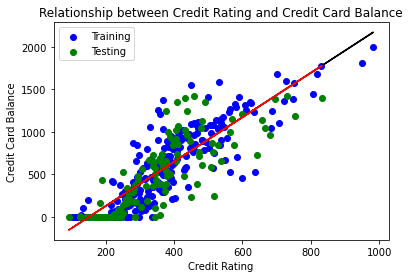

In [46]:
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['Rating'], train_df['Balance'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['Rating'], test_df['Balance'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['Rating'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['Rating'], simple_test_preds, color='red')

plt.ylabel('Credit Card Balance')
plt.xlabel('Credit Rating')
plt.title('Relationship between Credit Rating and Credit Card Balance')
plt.legend()
plt.show()

## Multiple Linear Regression

Same as simple linear regression, but with more inputs! 

In [47]:
# Check out our X_train info...
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 258 to 102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Income  268 non-null    float64
 1   Limit   268 non-null    int64  
 2   Rating  268 non-null    int64  
 3   Cards   268 non-null    int64  
 4   Age     268 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 22.6 KB


In [57]:
# Need to prep our data... can do that all with sklearn!
# Time to scale!
# Import our scaler
from sklearn.preprocessing import StandardScaler
# Instantiate our scaler
ss = StandardScaler()
# Fit our scaler 
X_train_scaled = ss.fit_transform(X_train)
# Transform training data

# Transform testing data
X_test_scaled = ss.transform(X_test)

<details>
    <summary> Answer
    </summary>

# Need to prep our data... can do that all with sklearn!
# Time to scale!
# Import our scaler
from sklearn.preprocessing import StandardScaler

# Instantiate our scaler
scaler = StandardScaler()

# Fit our scaler 
scaler.fit(X_train)

# Transform training data
X_train_scaled = scaler.transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)

</details>

### `fit` vs `transform` ?

`fit` allows the scaler to learn the patterns _only from the training data_! 

Why does that matter?

- mean and standard deviation are affected by the data in the rows - so, if we fit to the whole dataset instead of just the training data, the scaler would learn patterns influenced by the test data!

`transform` allows the scaler to apply the pattern it learns - can do so on both the train and test sets, so long as they're equivalent (aka have the same columns and were prepared the same way!)

## Should You Ever Fit on Your Test Set?  

![no](https://media.giphy.com/media/d10dMmzqCYqQ0/giphy.gif)

### **NEVER FIT ON TEST DATA** 

If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set.

In [58]:
# Set up and fit your sklearn model
model = LinearRegression().fit(X_train_scaled, y_train)

<details>
    <summary> Answer
    </summary>

model = LinearRegression()
model.fit(X_train_scaled, y_train)

</details>

In [59]:
# Check your results!
model.score(X_train_scaled, y_train)

0.886882050887701

<details>
    <summary> Answer
    </summary>

model.score(X_train_scaled, y_train)
    
model.score(X_test_scaled, y_test)


</details>

#### Observation time!

How'd we do? 

- 



## Beyond the $R^2$ Score

There are other metrics! 

#### Mean Absolute Error (MAE)

$$\text{MAE}(y, y_\text{pred}) = \frac{1}{n} \sum_{i=0}^{n} \left| y_i - y_\text{pred}i \right|$$

- Measures the average magnitude of errors regardless of direction, by calculating the total absolute value of errors and dividing by the number of samples (number of predictions made)
- **This error term is in the same units as the target!**

#### Mean Squared Error (MSE)

$$\text{MSE}(y, y_\text{pred}) = \frac{1}{n} \sum_{i=0}^{n} (y_i - y_\text{pred}i)^2$$

- Measures the average squared error, by calculating the sum of squared errors for all predictions then dividing by the number of samples (number of predictions)
- In other words - this is the Residual Sum of Squares (RSS) divided by the number of predictions!
- This error term is **NOT** in the same units as the target!

#### Root Mean Squared Error (RMSE)

$$\text{RMSE}(y, y_\text{pred}) = \sqrt{\frac{1}{n} \sum_{i=0}^{n} (y_i - y_\text{pred}i)^2}$$

- Measures the square root of the average squared error, by calculating the sum of squared errors for all predictions then dividing by the number of samples (number of predictions), then taking the square root of all that
- **This error term is in the same units as the target!**

Note - before, we were _maximizing_ R2 (best fit = largest R2 score). But we'd want to minimize these other error metrics.

Documentation: 
- [Regression Metrics in sklearn](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)
- [User Guide for Regression Metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [60]:
# Grab training set predictions
train_preds = model.predict(X_train_scaled)

# And test preds
test_preds = model.predict(X_test_scaled)


<details>
    <summary> Answer
    </summary>

train_preds = model.predict(X_train_scaled)

test_preds = model.predict(X_test_scaled)

</details>


In [61]:
# Imports
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
print("Training Metrics:")
# R2
print(f"R2: {r2_score(y_train, train_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(y_train, train_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(y_train, train_preds, squared=False):.3f}")

Training Metrics:
R2: 0.887
Mean Absolute Error: 118.442
Mean Squared Error: 25251.723
Root Mean Squared Error: 158.908


In [63]:
print("Testing Metrics:")
# R2
print(f"R2: {r2_score(y_test, test_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(y_test, test_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(y_test, test_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(y_test, test_preds, squared=False):.3f}")

Testing Metrics:
R2: 0.850
Mean Absolute Error: 124.024
Mean Squared Error: 27497.522
Root Mean Squared Error: 165.824


Note that I said that MAE and RMSE are both in the same units as our target, but you'll see that they are different here. What's the difference?

> "Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable."

-- Source: ["MAE and RMSE — Which Metric is Better?"](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

How can we interpret these?

- R2: "Our model accounts for __% of the variance in our target"
- MAE/RMSE: "Our model's predictions are, on average, about __ off from our actual target values" (here, balance is likely in dollars - so $___ off)

# k-Fold Cross-Validation: Even More Rigorous Validation  

Our goal of using a test set is to simulate what happens when our model attempts predictions on data it's never seen before. But there's always a chance our model will by chance perform well on the test set.

This is where we could use a more rigorous validation method and so we turn to **k-fold cross-validation**.

![kfolds](images/k_folds.png)

[image via sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)

In this process, we split the dataset into a train set and holdout test sets like usual by performing a shuffling train-test split on the train set.  

We then do $k$-number of _folds_ of the training data. This means we divide the training set into different sections or folds. We then take turns on using each fold as a **validation set** (or **dev set**) and train on the larger fraction. Then we calculate a validation score from the validation set the model has never seen. We repeat this process until each fold has served as a validation set.

This process allows us to try out training our model and check to see if it is likely to overfit or underfit without touching the holdout test data set.

If we think the model is looking good according to our cross-validation using the training data, we retrain the model using all of the training data. Then we can do one final evaluation using the test data. 

It's important that we hold onto our test data until the end and refrain from making adjustments to the model based on the test results.

In [71]:
# If we have time, we'll put this into practice...
from sklearn.model_selection import ShuffleSplit, cross_validate

model = LinearRegression()
splitter = ShuffleSplit(n_splits=5, test_size=.25, random_state=42)
scores = cross_validate(
    estimator=model,
    X = X_train,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

In [75]:
scores['train_score'].mean()

0.8879654633880195

In [76]:
scores['test_score'].mean()

0.8731348493220766

An important note to keep in mind from now on:

!["all models are wrong but some are useful" quote picture](images/allmodelsarewrong.jpg)

[Image Source](https://twitter.com/cwodtke/status/1244433603666178049)

## Level Up Exercise: Name that Model!

Consider the following scenarios and describe them according to bias and variance. There are four possibilities:

- a. The model has low bias and high variance.
- b. The model has high bias and low variance.
- c. The model has both low bias and low variance.
- d. The model has both high bias and high variance.

**Scenario 1**: The model has a low RMSE on training and a low RMSE on test.
<details>
    <summary> Answer
    </summary>
    c. The model has both low bias and low variance.
    </details>

**Scenario 2**: The model has a high $R^2$ on the training set, but a low $R^2$ on the test.
<details>
    <summary> Answer
    </summary>
    a. The model has low bias and high variance.
    </details>

**Scenario 3**: The model performs well on data it is fit on and well on data it has not seen.
<details>
    <summary> Answer
    </summary>
    c. The model has both low bias and low variance.
    </details>
  

**Scenario 4**: The model has a low $R^2$ on training but high on the test set.
<details>
    <summary> Answer
    </summary>
    d. The model has both high bias and high variance.
    </details>

**Scenario 5**: The model leaves out many of the meaningful predictors, but is consistent across samples.
<details>
    <summary> Answer
    </summary>
    b. The model has high bias and low variance.
    </details>

**Scenario 6**: The model is highly sensitive to random noise in the training set.
<details>
    <summary> Answer
    </summary>
    a. The model has low bias and high variance.
    </details>